### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

  $$ H_0: \mu_\text{height} = 67.60 $$
  $$ H_1: \mu_\text{height} \neq 67.60 $$

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [3]:
full_data.head(1)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179


In [4]:
full_data.height.mean(), full_data.height.std()

(67.597486973079342, 3.1194332065503421)

In [5]:
sample1 = full_data.sample(5)

In [6]:
sample1.height.mean()

67.882342520490838

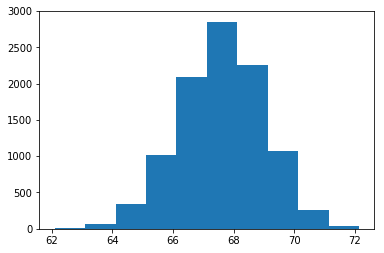

In [7]:
means = []
for _ in range(10000):
    means.append(full_data.sample(5).height.mean())
    
plt.hist(means);

In [9]:
np.array(means).std()

1.3873129885457822

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

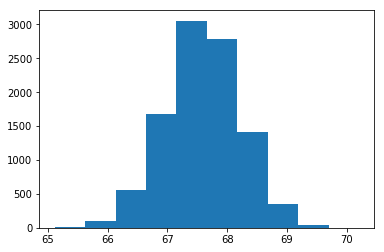

In [11]:
normal_dist = np.random.normal(67.60, np.array(means).std()/np.sqrt(5), 10000)
plt.hist(normal_dist);

In [13]:
low_ext = (67.60 - (sample1.height.mean() - 67.60))  
high_ext = sample1.height.mean()  

(normal_dist > high_ext).mean() + (normal_dist < low_ext).mean()

0.65290000000000004

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

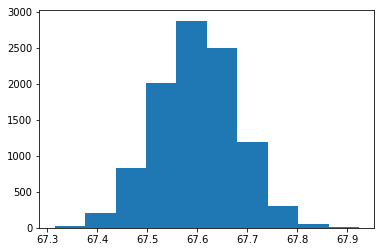

In [16]:
normal_dist2 = np.random.normal(67.60, np.array(means).std()/np.sqrt(300), 10000)
plt.hist(normal_dist2);

In [15]:
low_ext = (67.60 - (sample1.height.mean() - 67.60))  
high_ext = sample1.height.mean()  

(normal_dist2 > high_ext).mean() + (normal_dist2 < low_ext).mean()

0.00060000000000000006

`5.` Reflect on what happened by answering the final quiz in this concept.

In [17]:
normal_dist2.std()

0.080391446022216387